In [682]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random

In [683]:
#Model Variables and Parameters

age_average_x=20
# Current average ages in year for underground and overhead distribution lines (in years)
length_average_x=0.5
# Circuit length in mile for underground and overhead transission and distribution lines
number_circuit= 650
# Numbers showing different circuit in network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach circuit is about 25 miles in Larsen paper)
underground_2021=121
#Length of undergeound lines in miles in base year
overhead_line={'over_or_under':0,'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
underground_line={'over_or_under':1,'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
# over_or_under= Type of Line. x=0 for underground distribution lines and x=1 for overhead distribution lines
#lifespan=Useful lifespan of overhead line and underground lines (60 for overhead and 45 for underground)
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of T&D line 

In [684]:
shape_age_x=(age_average_x)/(((age_average_x)/2)**2)
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_age_x)

0.2


In [685]:
scale_age_x=(((age_average_x)/2)**2)/(age_average_x)
#scale of Gamma distribution required for simulating line circuits ages
print(scale_age_x)

5.0


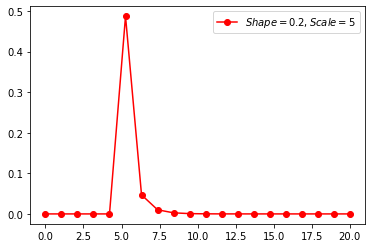

In [686]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_age_x, scale_age_x)

plt.plot(x, y, "ro-", label=(r'$Shape=0.2, Scale=5$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits ages

In [687]:
shape_length_x=length_average_x/(length_average_x/2)**2
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_length_x)

8.0


In [688]:
scale_length_x=(length_average_x/2)**2/length_average_x
#scale of Gamma distribution required for simulating line circuits ages
print(scale_length_x)

0.125


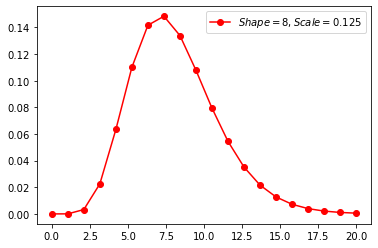

In [689]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_length_x, scale_length_x)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths

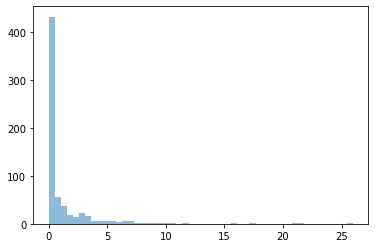

[1.01826720e-01 6.89056281e-02 6.70604882e-01 2.91043773e-01
 1.46260011e+00 3.21950736e-01 1.84280775e-01 1.09387306e+00
 3.08853401e-02 8.70313692e+00 1.68391037e-05 3.49601427e-02
 7.31471992e-04 3.99308806e-03 1.43523083e+00 5.45239864e+00
 3.41108836e-02 6.20918787e-01 1.01312936e-04 1.87379557e-02
 7.17623899e+00 6.05640969e-04 7.31213012e-04 7.27812399e-04
 2.61179487e-03 8.33675953e+00 5.17464758e+00 6.50208844e-01
 3.34598829e-02 8.13138197e-02 4.51907235e-04 2.81335916e-02
 5.31270852e+00 1.19736726e+00 1.42408307e-06 5.23468216e-02
 5.30195865e-03 3.97005480e-03 7.23859177e-03 1.26562267e-03
 9.83553390e-04 3.82865422e-01 6.49007802e-03 5.81467259e-03
 6.96741863e-08 4.66343038e-01 2.87914308e-02 7.84442918e-02
 2.66781694e-01 1.10186030e-02 1.23256405e+00 3.69447663e-05
 1.54843861e-03 3.25941448e-01 3.79132621e-01 3.81088474e-01
 3.97908055e-03 4.28778446e-01 1.09210027e-11 4.00245066e-02
 7.22963013e-06 8.12131509e+00 1.04457444e+01 1.27135051e-01
 2.40207052e+00 1.027576

In [690]:
age=np.random.gamma(shape_age_x,scale_age_x,number_circuit)
plt.hist(np.random.gamma(shape_age_x,scale_age_x,number_circuit),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined circuit's ages in the base year (2021)

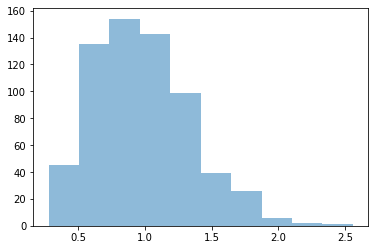

[0.75310733 1.20873737 1.09352116 0.79608211 1.07113061 0.99592696
 1.00794886 0.80573977 1.17642335 1.67690986 1.18438996 0.76717713
 1.15627955 1.00897511 0.90069642 1.47233721 0.83161301 1.36656545
 0.89741686 0.857173   0.72535951 0.80729115 0.69169994 2.15231011
 0.71284008 0.60638914 0.77064643 1.19770852 1.0735634  0.92040893
 0.50544878 1.03961386 1.52568968 0.45077464 1.35582524 1.52551528
 1.17149344 0.82892619 1.22089284 1.02349672 0.86929695 0.53986211
 0.52304983 0.74024353 1.10003471 0.71423428 0.94274116 0.89446436
 0.93789022 0.64142055 0.81249706 0.77589768 0.80641152 0.6945895
 1.07217583 0.80759973 0.59411773 0.91483582 0.41195399 1.25076575
 1.25376355 0.81229365 1.53861404 1.79336678 1.57570727 1.17113435
 0.98098296 0.95376142 1.38565163 0.4879734  0.81714684 0.79572099
 0.79485466 1.38576477 0.58748908 0.93658382 0.56026309 0.72037294
 0.99103385 0.49879642 1.8574417  1.25110617 1.48989483 0.68491258
 0.64622346 0.44596517 1.02654529 1.37976552 0.66761561 0.82992

In [691]:
lengths=np.random.gamma(shape_length_x,scale_length_x,number_circuit)
plt.hist(np.random.gamma(shape_length_x,scale_length_x,number_circuit),alpha=0.5)
plt.show()
print (lengths)
#Randomly determined circuit's ages in the base year (2021)
### I guess these numbers are not correct because I do not expect to see such circuit's ages from a gamma distribution with an average age 20.

In [692]:
#class Circuit:
    #def __init__(self, length, age, x):
        #self.length=length
        #self.age=age
        #self.x=x
    
#circuit_1=Circuit(25,20,0)
#circuit_2=Circuit(24,21,1)
#circuit_3=Circuit(22,22,1)
#circuit_4=Circuit(18,18,0)
#circuit_5=Circuit(25,30,1)
#circuit_6=Circuit(36,19,0)
#circuit_7=Circuit(31,29,0)
#circuit_8=Circuit(29,27,1)
#circuit_9=Circuit(25,24,0)
#circuit_10=Circuit(27,26,0)

In [698]:
class Circuit:
###Lifecycle Infrastructure Costs:
    def whether_over_or_under(self):
        random.seed(number_circuit)
        self.over_or_under=random.randint(0,1)
        return (self.over_or_under)
    # Randomly determining status of overhead or underground of circuit
    def get_random_age_2021(self):
        random.seed(number_circuit)
        self.age= np.random.gamma(shape_age_x,scale_age_x)
        return (self.age)
    # Randomly determining circuit's ages in the base year (2021)
    def get_random_length_2021(self):
        random.seed(number_circuit)
        self.length= np.random.gamma(shape_length_x,scale_length_x)
        return (self.length)
    # Randomly determining circuit's ages in the base year (2021)
###Three above methods are defined to identify lengh, age and overhead or underground, which are three atributes of a circuit.
    #def lifespan_over_or_under(self):
        #if self.over_or_under()==0:
            #lifespan_x= overhead_line['lifespan']
        #elif self.over_or_under()==1:
            #lifespan_x= underground_line['lifespan']
        #else:
            #lifespan_x=0
        #return (lifespan_x)
    #def replcost_x_over_or_under(self):
        #if self.over_or_under==0:
            #lifespan_x= overhead_line['lifespan']
        #if self.over_or_under==1:
            #lifespan_x= underground_line['lifespan']
        #print (lifespan_x)
###Above methods are for defining different parameters in the model subject to x=0(overhead) or x=1(underground)
    def age_circuit_i_t(self):
        over_or_under= self.whether_over_or_under()
        if over_or_under==0:
            lifespan_x= int(overhead_line['lifespan'])
        elif over_or_under==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            None
        return self.get_random_length_2021()
        for t in range (2021,2021+int(lifespan_x)):
            age_i_t=[]
            if self.age<=lifespan_x:
                self.age= (self.age)+(t-2021)
            elif self.age-lifespan_x==1:
                self.age=1
            elif self.age-lifespan_x>1:
                self.age=(self.age)+1
            age_i_t.append(self.age)
            return(age_i_t)
    # Determining circuit's ages in year t
    def replcost_x_t(self):
        over_or_under= self.whether_over_or_under()
        if over_or_under==0:
            lifespan_x=overhead_line['lifespan']
            replecost_x=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        elif over_or_under==1:
            lifespan_x= underground_line['lifespan']
            replecost_x=underground_line['replcost']
            replcost_growth_rate_x= underground_line['replcost_growth_rate']
        else:
            lifespan_x=0
            replecost_x=0
            replcost_growth_rate_x=0
        for t in range (2021,2021+int(lifespan_x)):
            if t==2021:
                replcost_x_t= replecost_x
            else:
                replcost_x_t= (replecost_x)+(replcost_growth_rate_x)*(t-2021)*(replecost_x)
            return (replcost_x_t)
    #Determining replacement cost line x in time t
    def capex_StatusQuo_i(self):
        age_i_t=self.age_circuit_i_t()
        capex_StatusQuo_i=0
        for t in range (2021,2021+int(lifespan_x)):
            if age_i_t==1:
                capex_i=((rplcost_x_t)(age_i_t))/((1+r)^(t-2021))
                capex_StatusQuo_i=(capex_StatusQuo_i)+(capex_i)
            else:
                 capex_StatusQuo_i=0
            return (capex_StatusQuo_i)
    #Status quo capital expenses (CAPEX) occurring in future years (t) when the age of the circuit exceeds the expected useful lifespan
    def opex_x_t (self):
        over_or_under= self.whether_over_or_under()
        age_i_t=self.age_circuit_i_t()
        replcost_x_t=self.replcost_x_t()
        if over_or_under==0:
            om_percentage_replcost_x=overhead_line['om_percentage_replcost']
        elif over_or_under==1:
            om_percentage_replcost_x= underground_line['om_percentage_replcost']
        else:
            om_percentage_replcost_x=0
        for t in range (2021,2021+int(lifespan_x)):
            opex_x_t=0
            if age_i_t==1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
            elif age_i_t>1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t=(opex_x_t)+(om_percentage_replcost_x)*(replcost_x_t)
            else:
                None
            return (opex_x_t)
    #Annual operation and maintenance expenses for each line
    def opex_StatusQuo_i (self):
        opex_x_t=self.opex_x_t()
        length_i=self.get_random_length_2021()
        opex_StatusQuo_i=0
        for t in range (2021,2021+int(lifespan_x)):
            opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
            opex_StatusQuo_i=(opex_StatusQuo_i)+(opex_i)
        return (opex_StatusQuo_i)
    #Discounting annual O&M expenses incurred for each circuit 
    def lifecyclecost_StatusQuo(self):
        lifecyclecost_StatusQuo=0
        for i in range (number_circuit):
            lifecyclecost_i= self.capex_StatusQuo_i()+self.opex_StatusQuo_i()
            lifecyclecost_StatusQuo=lifecyclecost_StatusQuo+lifecyclecost_i
        return (lifecyclecost_StatusQuo)
    #Total lifecycle costs, under the status quo
###Above methods are required methods for determining lifecycle costs associated with status quo
    def first_retire_i(self):
        age_2021_i=self.get_random_age_2021()
        over_or_under= self.whether_over_or_under()
        if over_or_under==0:
            lifespan_x=overhead_line['lifespan']
        elif over_or_under==1:
            lifespan_x= underground_line['lifespan']
        else:
            lifespan_x=0
        first_retire_i=(lifespan_x)-(age_2021_i)+2021
        return (first_retire_i)
    #Determining the first retirement year Under the undergrounding alternative
    def capex_underground_i(self):
        over_or_under= self.whether_over_or_under()
        if over_or_under==0:
            over_or_under=1
        length_i=self.get_random_length_2021()
        capex_underground_i=0
        rplcost_x_t=self.replcost_x_t()
        for t in range (2021,2021+int(lifespan_x)):
            capex_i=((rplcost_x_t)(length_i))/((1+r)^(t-2021))
            capex_underground_i=(capex_underground_i)+(capex_i)
        return (capex_StatusQuo_i)
    #Undergrounding capital expenses
    def opex_underground_i (self):
        over_or_under= self.whether_over_or_under()
        opex_x_t=self.opex_x_t()
        length_i=self.get_random_length_2021()
        first_retire_i=self.first_retire_i()
        opex_underground_i=0
        for t in range (2021,2021+int(lifespan_x)):
            if  over_or_under==1:
                opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                opex_underground_i=(opex_underground_i)+(opex_i)
            else:        
                if t< first_retire_i:
                    opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                    opex_underground_i=(opex_underground_i)+(opex_i)
                else:
                    over_or_under==1
                    opex_x_t=self.opex_x_t()
                    opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                    opex_underground_i=(opex_underground_i)+(opex_i)
        return (opex_underground_i)
    #Annual operation and maintenance expenses for each line Under the undergrounding alternative
    def lifecyclecost_underground(self):
        lifecyclecost_underground=0
        for i in range (number_circuit):
            lifecyclecost_i= self.capex_underground_i()+self.opex_underground_i()
            lifecyclecost_underground=lifecyclecost_underground+lifecyclecost_i
        return (lifecyclecost_underground)
    #Total lifecycle costs, under the underground alternative.
###Above methods are required methods for determining lifecycle costs associated with underground alternative.
    def underground_t(self):
        first_retire_i=self.first_retire_i()
        length_i=self.get_random_length_2021()
        for t in range (2021,2021+int(lifespan_x)):
            if t>= first_retire_i:
                sumlength=0
                for i in range (number_circuit):
                    sumlength=sumlength+length_i
                    return (sumlength)
                underground_t=underground_2021+sumlength
            else:
                underground_t=underground_2021
        return(underground_t)
    #Determining future annual underground line mileage
    def lifecycle_net(self):
        lifecyclecost_underground=self.lifecyclecost_underground()
        lifecyclecost_StatusQuo=self.lifecyclecost_StatusQuo()
        lifecycle_net=lifecyclecost_underground-lifecyclecost_StatusQuo
    #Determining the additional lifecycle costs due to undergrounding        
            
###Ecosystem-related Restoration Costs:

###Construction-related Morbidity and Mortality Costs:
       

In [699]:
for i in range (number_circuit):
    circuit_i=Circuit()
    circuit_over_or_under=circuit_i.whether_over_or_under()
    circuit_age_2021=circuit_i.get_random_age_2021()
    circuit_age_i_t=circuit_i.age_circuit_i_t()
    print('x=',circuit_over_or_under,'&','Segment age in 2021=',circuit_age_2021,'&','Segment age in t=',circuit_age_i_t)
# Producing overhead or underground status, age in base year and age in year t for a circuite using class methods
# I do not know why i just get one circuit_age_i_t in the output. I expected to see t numbers of ages. one per each year.
# I do not know why I just received x=1 in my random numbers and how I can change it to a way to produce 66% x=1 and 44% x=0.

x= 1 & Segment age in 2021= 5.313082165112154 & Segment age in t= 0.8364018056516237
x= 1 & Segment age in 2021= 3.771512774902255 & Segment age in t= 0.7276835284974486
x= 1 & Segment age in 2021= 0.05186669743378469 & Segment age in t= 0.6929654715727736
x= 1 & Segment age in 2021= 0.000831795218125222 & Segment age in t= 0.6090836156479343
x= 1 & Segment age in 2021= 0.06026889477505491 & Segment age in t= 0.7150187723533835
x= 1 & Segment age in 2021= 0.5183547853011752 & Segment age in t= 1.997180622261146
x= 1 & Segment age in 2021= 7.006495913910424 & Segment age in t= 0.6135290399442049
x= 1 & Segment age in 2021= 0.0480920995658857 & Segment age in t= 0.927960477493842
x= 1 & Segment age in 2021= 2.031820659206712 & Segment age in t= 0.36695213661588305
x= 1 & Segment age in 2021= 0.026041401640002574 & Segment age in t= 0.6881949901770645
x= 1 & Segment age in 2021= 0.4017423875358784 & Segment age in t= 1.3017154880810824
x= 1 & Segment age in 2021= 2.5074822385198745 & Segm

x= 1 & Segment age in 2021= 0.45961890191938554 & Segment age in t= 0.2730713771664142
x= 1 & Segment age in 2021= 0.0008946760866298766 & Segment age in t= 1.1766633486059561
x= 1 & Segment age in 2021= 0.00823388754115247 & Segment age in t= 1.8821277907472587
x= 1 & Segment age in 2021= 0.15711650982522535 & Segment age in t= 1.2148775289218041
x= 1 & Segment age in 2021= 0.004954388151929574 & Segment age in t= 1.0374788024092305
x= 1 & Segment age in 2021= 2.3883639783687385e-08 & Segment age in t= 0.7027973848647661
x= 1 & Segment age in 2021= 0.28388351843819826 & Segment age in t= 0.9529892095117753
x= 1 & Segment age in 2021= 0.002173250019130524 & Segment age in t= 1.6569195066255478
x= 1 & Segment age in 2021= 0.1765974090773767 & Segment age in t= 1.922510088591103
x= 1 & Segment age in 2021= 0.012818146867589666 & Segment age in t= 1.1051816065306042
x= 1 & Segment age in 2021= 2.06332891153244 & Segment age in t= 0.7775865875991952
x= 1 & Segment age in 2021= 0.1657926347

x= 1 & Segment age in 2021= 0.00015572501267820306 & Segment age in t= 0.5762495671203519
x= 1 & Segment age in 2021= 1.518889224987272e-05 & Segment age in t= 0.7588984273108591
x= 1 & Segment age in 2021= 4.871226108565512 & Segment age in t= 1.1158733684037048
x= 1 & Segment age in 2021= 0.003513757865668262 & Segment age in t= 0.5409905977299145
x= 1 & Segment age in 2021= 1.6795879908152116e-11 & Segment age in t= 1.3396385084472078
x= 1 & Segment age in 2021= 0.004471469490885414 & Segment age in t= 0.7583660439529862
x= 1 & Segment age in 2021= 0.022358446591287537 & Segment age in t= 1.1023064071697508
x= 1 & Segment age in 2021= 0.0509950765967724 & Segment age in t= 1.1577087697803452
x= 1 & Segment age in 2021= 0.8622258432342382 & Segment age in t= 0.810036270937767
x= 1 & Segment age in 2021= 0.2662453025105437 & Segment age in t= 1.1692569184391703
x= 1 & Segment age in 2021= 0.0004929309348626652 & Segment age in t= 1.7718282424601566
x= 1 & Segment age in 2021= 1.747363

In [695]:
for i in range (number_circuit):
    circuit_i=Circuit()
    replcost_x_t_i=circuit_i.replcost_x_t()
    print(replcost_x_t_i)
    capex_StatusQuo_i=circuit_i.capex_StatusQuo_i()
    print(capex_StatusQuo_i)
    opex_x_t=circuit_i.opex_x_t()
    print(opex_x_t)
    opex_StatusQuo_i=circuit_i.opex_StatusQuo_i()
    print(opex_StatusQuo)
    lifecyclecost_StatusQuo=self.lifecyclecost_StatusQuo()
    print(replcost_x_t_i,capex_StatusQuo_i,opex_x_t,pex_StatusQuo_i,lifecyclecost_StatusQuo)
# Producing replacement cost_xt, capex_StatusQuo_i, opex_x_t, opex_StatusQuo and  in base year and lifecyclecost_StatusQuo in year for a circuite using class methods
# I do not know how I can solve the issue on line 111: TypeError: 'float' object is not callable

357000
0
3570.0


TypeError: 'float' object is not callable